Start of Capstone 1: loading in data from the town of Alta. This data was available at https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00420072/detail <br>
The station is located at: <br>
40.59058°, -111.63703° <br>
Elevation: 2654.8 m (8710ft) <br>
NOAA Station: USC00420072 <br>
Records go from November 21, 1944 to present (May 25, 2020) <br>
This gives a long data set to hopefully tease out some meaningful snow models based on time of year. <br>

In [255]:
import os
import pandas as pd
import numpy as np
import datetime

In [256]:
# change to the path with the raw csv file
path="C:\Springboard\Github\Capstone1_alta\Raw"
os.chdir(path) 

In [257]:
# load the raw data file
alta = pd.read_csv("alta_ski_v2.csv")

In [258]:
# check out the top of the df that was just loaded
alta.head()

,STATION,NAME,DATE,DAPR,DASF,MDPR,MDSF,PRCP,SNOW,SNWD,...,TOBS,WT01,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT11
0,USC00420072,"ALTA, UT US",1944-11-21,NaN,NaN,NaN,NaN,0.00,NaN,20.0,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",1944-11-22,NaN,NaN,NaN,NaN,0.00,NaN,19.0,...,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",1944-11-23,NaN,NaN,NaN,NaN,0.00,NaN,19.0,...,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",1944-11-24,NaN,NaN,NaN,NaN,0.82,6.0,25.0,...,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",1944-11-25,NaN,NaN,NaN,NaN,0.06,11.0,36.0,...,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
# lets check out the tail to see how things look there
alta.tail()

,STATION,NAME,DATE,DAPR,DASF,MDPR,MDSF,PRCP,SNOW,SNWD,...,TOBS,WT01,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT11
21804,USC00420072,"ALTA, UT US",2020-05-12,NaN,NaN,NaN,NaN,0.00,0.0,37.0,...,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21805,USC00420072,"ALTA, UT US",2020-05-13,NaN,NaN,NaN,NaN,0.01,0.0,36.0,...,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21806,USC00420072,"ALTA, UT US",2020-05-14,NaN,NaN,NaN,NaN,0.00,0.0,34.0,...,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21807,USC00420072,"ALTA, UT US",2020-05-15,NaN,NaN,NaN,NaN,0.00,0.0,32.0,...,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21808,USC00420072,"ALTA, UT US",2020-05-16,NaN,NaN,NaN,NaN,0.00,0.0,29.0,...,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I tried to retrieve a lot of different data from this weather station, but it looks like some of those items are not recorded at this particular weather station, so I will drop these columns.

In [260]:
alta.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'DASF', 'MDPR', 'MDSF', 'PRCP',
       'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS', 'WT01', 'WT03', 'WT04', 'WT05',
       'WT06', 'WT07', 'WT08', 'WT09', 'WT11'],
      dtype='object')

In [261]:
alta.drop(['STATION','NAME','WT01', 'WT03', 'WT04', 'WT05',
       'WT06', 'WT07', 'WT08', 'WT09', 'WT11'], axis=1, inplace=True)

In [262]:
alta.head()

,DATE,DAPR,DASF,MDPR,MDSF,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
0,1944-11-21,NaN,NaN,NaN,NaN,0.00,NaN,20.0,52.0,9.0,20.0
1,1944-11-22,NaN,NaN,NaN,NaN,0.00,NaN,19.0,48.0,19.0,29.0
2,1944-11-23,NaN,NaN,NaN,NaN,0.00,NaN,19.0,56.0,24.0,40.0
3,1944-11-24,NaN,NaN,NaN,NaN,0.82,6.0,25.0,52.0,14.0,16.0
4,1944-11-25,NaN,NaN,NaN,NaN,0.06,11.0,36.0,26.0,11.0,14.0


In [263]:
alta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21809 entries, 0 to 21808
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    21809 non-null  object 
 1   DAPR    72 non-null     float64
 2   DASF    31 non-null     float64
 3   MDPR    115 non-null    float64
 4   MDSF    53 non-null     float64
 5   PRCP    21167 non-null  float64
 6   SNOW    21237 non-null  float64
 7   SNWD    19598 non-null  float64
 8   TMAX    21215 non-null  float64
 9   TMIN    21120 non-null  float64
 10  TOBS    19861 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.8+ MB


There are 4 more columns that don't appear to hold any valuable data. Let's drop those as well

In [264]:
alta.drop(['DAPR', 'DASF', 'MDPR', 'MDSF'], axis=1, inplace=True)

In [265]:
alta.head()

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
0,1944-11-21,0.00,NaN,20.0,52.0,9.0,20.0
1,1944-11-22,0.00,NaN,19.0,48.0,19.0,29.0
2,1944-11-23,0.00,NaN,19.0,56.0,24.0,40.0
3,1944-11-24,0.82,6.0,25.0,52.0,14.0,16.0
4,1944-11-25,0.06,11.0,36.0,26.0,11.0,14.0


In [266]:
alta.tail()

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
21804,2020-05-12,0.00,0.0,37.0,58.0,45.0,52.0
21805,2020-05-13,0.01,0.0,36.0,52.0,33.0,45.0
21806,2020-05-14,0.00,0.0,34.0,45.0,31.0,43.0
21807,2020-05-15,0.00,0.0,32.0,47.0,34.0,45.0
21808,2020-05-16,0.00,0.0,29.0,53.0,29.0,52.0


This looks so much better now and is only the data that we need. Let's check for Nan values in the remaining columns

Here is what each column abbreviation stands for: <br>
PRCP - precipitation measured in inches (or water equivalent in the case of snow) <br>
SNOW - snow accumulation in the last 24 hours measured in inches <br>
SNWD - snow depth at the current measurement <br>
TMAX - max temperature in the last 24hrs in F <br>
TMIN - min temperature in the last 24hrs in F <br>
TOBS - observed temperature as reported in the daily summary <br>

In [267]:
alta.describe()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
count,21167.000000,21237.000000,19598.000000,21215.000000,21120.000000,19861.000000
mean,0.159239,1.542205,41.446933,45.869338,27.046686,37.402749
std,0.362051,3.701727,41.732264,17.846398,15.543347,18.593965
min,0.000000,0.000000,0.000000,-18.000000,-26.000000,-18.000000
25%,0.000000,0.000000,0.000000,32.000000,15.000000,23.000000
50%,0.000000,0.000000,32.000000,44.000000,26.000000,35.000000
75%,0.130000,0.800000,76.000000,62.000000,40.000000,52.000000
max,5.000000,38.000000,179.000000,94.000000,72.000000,113.000000


In [268]:
alta.shape

(21809, 7)

based on those numbers, there probably are some Nan and missing values that need to be filled in this data set. Let's look at the info again.

In [269]:
alta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21809 entries, 0 to 21808
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    21809 non-null  object 
 1   PRCP    21167 non-null  float64
 2   SNOW    21237 non-null  float64
 3   SNWD    19598 non-null  float64
 4   TMAX    21215 non-null  float64
 5   TMIN    21120 non-null  float64
 6   TOBS    19861 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.2+ MB


Let's fill some values. Precipitation and Snow are daily counts, so they are likely to be 0 where there is no value in their column. We'll fill them as such.

In [270]:
alta['PRCP'].fillna(value=0, inplace=True)

In [271]:
alta['SNOW'].fillna(value=0, inplace=True)

In [272]:
# I'm very confident in the fill of those 2 cells and those are the ones I care about the most.
# I'm going to save that DF before I try some more of the fun data wrangling
alta1 = alta.copy()

In [273]:
alta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21809 entries, 0 to 21808
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    21809 non-null  object 
 1   PRCP    21809 non-null  float64
 2   SNOW    21809 non-null  float64
 3   SNWD    19598 non-null  float64
 4   TMAX    21215 non-null  float64
 5   TMIN    21120 non-null  float64
 6   TOBS    19861 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.2+ MB


In [274]:
# now, let's work on the SNWD - snow depth. Let's find out when that depth is Nan
snwd_nan = pd.isna(alta['SNWD'])

In [275]:
# let's use that to find the dates that where SNWD is Nan
alta[snwd_nan]

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
131,1945-07-01,0.00,0.0,NaN,66.0,53.0,62.0
132,1945-07-02,0.00,0.0,NaN,66.0,55.0,58.0
133,1945-07-03,0.00,0.0,NaN,76.0,56.0,67.0
134,1945-07-04,0.00,0.0,NaN,78.0,65.0,67.0
135,1945-07-05,0.00,0.0,NaN,84.0,65.0,68.0
...,...,...,...,...,...,...,...
20692,2017-04-25,1.81,15.6,NaN,29.0,24.0,27.0
20841,2017-09-22,0.50,3.4,NaN,34.0,27.0,31.0
20845,2017-09-26,0.00,0.0,NaN,48.0,25.0,37.0
21441,2019-05-15,0.00,0.0,NaN,58.0,40.0,43.0


For summer time dates, it makes sense that snow depth would be zero for those entries, but April and November are still likely to have some snow. To further make adjustments to this, I want to see where most of those values are in the year, so I will need to strip out month and day from the date

In [276]:
alta["MONTH"] = alta["DATE"].str[5:7]

In [277]:
alta["DAY"] = alta["DATE"].str[8:10]

In [278]:
alta.tail()

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,MONTH,DAY
21804,2020-05-12,0.00,0.0,37.0,58.0,45.0,52.0,05,12
21805,2020-05-13,0.01,0.0,36.0,52.0,33.0,45.0,05,13
21806,2020-05-14,0.00,0.0,34.0,45.0,31.0,43.0,05,14
21807,2020-05-15,0.00,0.0,32.0,47.0,34.0,45.0,05,15
21808,2020-05-16,0.00,0.0,29.0,53.0,29.0,52.0,05,16


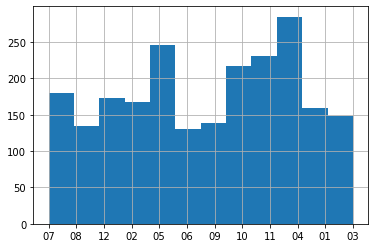

In [279]:
hist = alta[snwd_nan]["MONTH"].hist(bins=12)

In [280]:
#these values don't appear to be concentrated in the summer time, so I think I will just use back fill to cover them.
alta['SNWD'].fillna(method='bfill', inplace=True)

In [281]:
# If Max Temp or min Temp is missing, we will just fill that with the observed temperature
alta['TMAX'].fillna(value=alta['TOBS'], inplace=True)
alta['TMIN'].fillna(value=alta['TOBS'], inplace=True)

In [282]:
# that almost fills everything. I will come back to the remaining values for each of those columns
# for The Observed Temperature, I will take an average of the the Max and Min; I hope that fills a lot
alta['TMIN'].fillna(value=(alta['TMAX']+alta['TMIN'])/2, inplace=True)

In [283]:
# let's see how well that filled the Nan values
alta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21809 entries, 0 to 21808
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    21809 non-null  object 
 1   PRCP    21809 non-null  float64
 2   SNOW    21809 non-null  float64
 3   SNWD    21809 non-null  float64
 4   TMAX    21248 non-null  float64
 5   TMIN    21237 non-null  float64
 6   TOBS    19861 non-null  float64
 7   MONTH   21809 non-null  object 
 8   DAY     21809 non-null  object 
dtypes: float64(6), object(3)
memory usage: 1.5+ MB


In [284]:
# to fill the remaining TMAX, let's try to use an average for each Month Day combo
# Example: TMAX on January 1st, should be similar to the average TMAX on January 1st
#t_max_mean = alta.groupby(["MONTH", "DAY"]).mean()["TMAX"] - kind of a weird way to get at it that didn't work
# answer actually came from Stackoverflow: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group
alta['TMAX'].fillna(alta.groupby(["MONTH", "DAY"])["TMAX"].transform('mean'), inplace=True)

In [285]:
# let's do the same thing for TMIN
alta['TMIN'].fillna(alta.groupby(["MONTH", "DAY"])["TMIN"].transform('mean'), inplace=True)
alta['TOBS'].fillna(alta.groupby(["MONTH", "DAY"])["TOBS"].transform('mean'), inplace=True)

In [286]:
# let's see that all values are filled
alta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21809 entries, 0 to 21808
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    21809 non-null  object 
 1   PRCP    21809 non-null  float64
 2   SNOW    21809 non-null  float64
 3   SNWD    21809 non-null  float64
 4   TMAX    21809 non-null  float64
 5   TMIN    21809 non-null  float64
 6   TOBS    21809 non-null  float64
 7   MONTH   21809 non-null  object 
 8   DAY     21809 non-null  object 
dtypes: float64(6), object(3)
memory usage: 1.5+ MB


In [287]:
alta.describe()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
count,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000
mean,0.154552,1.501756,39.350956,46.009320,27.310774,36.993228
std,0.357696,3.661164,41.374939,17.787275,15.561632,18.259382
min,0.000000,0.000000,0.000000,-18.000000,-26.000000,-18.000000
25%,0.000000,0.000000,0.000000,32.000000,16.000000,23.000000
50%,0.000000,0.000000,26.000000,44.000000,26.000000,34.000000
75%,0.120000,0.500000,74.000000,62.000000,40.000000,51.000000
max,5.000000,38.000000,179.000000,94.000000,77.000000,113.000000


That doesn't seem correct that the max of TOBS is greater than the max of TMAX and 113F seems extremely warm for Alta. I may have to address this outlier. More importantly, let's make sure TMIN is never larger than TMAX. If they are, it's likely somebody transposed these in data entry.


In [288]:
alta2 = alta.copy()

First, we need to make sure that tmax is never less than tmin. Obviously, this would be an issue recording the temperatures in the first place. We'll flip the values if this occurs.

In [289]:
# check to make sure TMAX > TMIN; if they are not, then flip them
mistake = alta[alta['TMIN'] > alta['TMAX']] # ['TMAX']
alta.loc[mistake.index, 'TMIN'] = mistake['TMAX']
alta.loc[mistake.index, 'TMAX'] = mistake['TMIN']

In [290]:
# check to make sure all mistakes were corrected
alta[alta['TMIN'] > alta['TMAX']]

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,MONTH,DAY


Those were a few mistakes that needed to be corrected, but now should be good now.

In [291]:
alta.describe()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
count,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000
mean,0.154552,1.501756,39.350956,46.015510,27.304584,36.993228
std,0.357696,3.661164,41.374939,17.782004,15.560215,18.259382
min,0.000000,0.000000,0.000000,-18.000000,-26.000000,-18.000000
25%,0.000000,0.000000,0.000000,32.000000,16.000000,23.000000
50%,0.000000,0.000000,26.000000,44.000000,26.000000,34.000000
75%,0.120000,0.500000,74.000000,62.000000,40.000000,51.000000
max,5.000000,38.000000,179.000000,94.000000,77.000000,113.000000


In [292]:
# let's make sure there are no duplicate dates
alta.duplicated("DATE").any()

False

In [293]:
# let's see if there are any situations where the observed temperature is higher than the max temperature
alta[alta['TOBS'] > alta['TMAX']]

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,MONTH,DAY
795,1947-08-14,0.00,0.0,2.0,68.0,56.0,69.000000,08,14
1104,1949-01-03,0.00,0.0,98.0,15.0,-10.0,18.718750,01,03
1118,1949-01-17,0.00,1.0,98.0,20.0,0.0,22.838710,01,17
1224,1949-11-11,1.20,13.0,35.0,29.0,15.0,29.444444,11,11
1254,1949-12-11,0.63,7.0,31.0,10.0,1.0,20.586207,12,11
...,...,...,...,...,...,...,...,...,...
16826,2006-03-13,0.17,5.0,0.0,10.0,6.0,13.000000,03,13
16890,2006-05-16,0.00,0.0,0.0,59.0,43.0,67.000000,05,16
17015,2006-10-18,0.08,2.0,8.0,25.0,14.0,29.000000,10,18
17970,2009-08-07,0.00,0.0,0.0,56.0,38.0,62.142857,08,07


In [294]:
# check to make sure TMAX > TOBS; if they are not, then flip them
mistake2 = alta[alta['TOBS'] > alta['TMAX']] # ['TMAX']
alta.loc[mistake2.index, 'TOBS'] = mistake2['TMAX']
alta.loc[mistake2.index, 'TMAX'] = mistake2['TOBS']

Let's see if that worked.

In [295]:
alta.describe()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
count,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000
mean,0.154552,1.501756,39.350956,46.094742,27.304584,36.913996
std,0.357696,3.661164,41.374939,17.692602,15.560215,18.306671
min,0.000000,0.000000,0.000000,-8.000000,-26.000000,-18.000000
25%,0.000000,0.000000,0.000000,32.000000,16.000000,23.000000
50%,0.000000,0.000000,26.000000,44.000000,26.000000,34.000000
75%,0.120000,0.500000,74.000000,62.000000,40.000000,51.000000
max,5.000000,38.000000,179.000000,113.000000,77.000000,84.000000


In [296]:
alta[alta['TOBS'] > alta['TMAX']]

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,MONTH,DAY


This looks much better. There is one last test to make sure TOBS > TMIN

In [297]:
alta[alta['TOBS'] < alta['TMIN']]

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,MONTH,DAY
519,1946-09-23,0.00,0.0,0.0,51.0,46.0,30.000000,09,23
872,1947-10-30,0.89,7.0,13.0,36.0,27.0,26.000000,10,30
902,1947-11-29,0.00,0.0,43.0,47.0,36.0,28.000000,11,29
1004,1948-03-10,0.86,12.0,98.0,17.0,13.0,5.000000,03,10
1081,1948-12-11,0.00,0.6,59.0,28.0,22.0,20.586207,12,11
...,...,...,...,...,...,...,...,...,...
16022,2003-11-29,0.00,0.0,43.0,44.0,39.0,25.000000,11,29
16226,2004-06-20,0.00,0.0,0.0,64.0,51.0,40.000000,06,20
16609,2005-08-08,0.00,0.0,0.0,74.0,66.0,53.000000,08,08
16740,2005-12-17,0.10,2.0,49.0,17.0,15.0,5.000000,12,17


Let's flip the data for the minimum as well

In [298]:
# check to make sure TOBS > TMIN; if they are not, then flip them
mistake3 = alta[alta['TOBS'] < alta['TMIN']] # ['TMAX']
alta.loc[mistake3.index, 'TOBS'] = mistake3['TMIN']
alta.loc[mistake3.index, 'TMIN'] = mistake3['TOBS']

In [299]:
# check that was done correctly
alta[alta['TOBS'] < alta['TMIN']]

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,MONTH,DAY


In [300]:
alta.describe()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
count,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000,21809.000000
mean,0.154552,1.501756,39.350956,46.094742,27.220721,36.997859
std,0.357696,3.661164,41.374939,17.692602,15.550385,18.270581
min,0.000000,0.000000,0.000000,-8.000000,-26.000000,-18.000000
25%,0.000000,0.000000,0.000000,32.000000,16.000000,23.000000
50%,0.000000,0.000000,26.000000,44.000000,26.000000,34.000000
75%,0.120000,0.500000,74.000000,62.000000,40.000000,51.000000
max,5.000000,38.000000,179.000000,113.000000,77.000000,84.000000


That looks much better. 

In [301]:
alta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21809 entries, 0 to 21808
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    21809 non-null  object 
 1   PRCP    21809 non-null  float64
 2   SNOW    21809 non-null  float64
 3   SNWD    21809 non-null  float64
 4   TMAX    21809 non-null  float64
 5   TMIN    21809 non-null  float64
 6   TOBS    21809 non-null  float64
 7   MONTH   21809 non-null  object 
 8   DAY     21809 non-null  object 
dtypes: float64(6), object(3)
memory usage: 1.5+ MB


In [302]:
alta['DATE'] = pd.to_datetime(alta['DATE'], infer_datetime_format=True)

I think that is it for the snowfall data. Now, time to move on to loading in the PDO and AMO data.

__PDO__ <br>
One of the main factors in climate is The Pacific Decadal Oscillation (PDO). We found this data that is by the month back before Alta began keeping track of snowfall. <br>
http://research.jisao.washington.edu/pdo/PDO.latest.txt <br>



In [303]:
# import PDO with space separating
PDO = pd.read_csv('PDO_raw.csv', sep='\s+')

In [304]:
PDO.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1900,0.04,1.32,0.49,0.35,0.77,0.65,0.95,0.14,-0.24,0.23,-0.44,1.19
1,1901,0.79,-0.12,0.35,0.61,-0.42,-0.05,-0.60,-1.20,-0.33,0.16,-0.60,-0.14
2,1902,0.82,1.58,0.48,1.37,1.09,0.52,1.58,1.57,0.44,0.70,0.16,-1.10
3,1903,0.86,-0.24,-0.22,-0.50,0.43,0.23,0.40,1.01,-0.24,0.18,0.08,-0.03
4,1904,0.63,-0.91,-0.71,-0.07,-0.22,-1.53,-1.58,-0.64,0.06,0.43,1.45,0.06


In [305]:
PDO.shape

(119, 13)

In [306]:
PDO.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'],
      dtype='object')

This is the data that we want, but it's not in the shape that we want. Let's transform that so that it's a similar shape to our ski data.

In [307]:
PDO = pd.melt(PDO, id_vars=['YEAR'], var_name='MONTH', value_name='PDO')
PDO.head()

,YEAR,MONTH,PDO
0,1900,JAN,0.04
1,1901,JAN,0.79
2,1902,JAN,0.82
3,1903,JAN,0.86
4,1904,JAN,0.63


That is not exactly what I wanted. <br>
Since PDO is given by the month and snowfall data is by the day, we need to fill in a lot of data. We will assumed that the PDO is measured in the middle of the month, on the 15th, so let's enter that column.

In [308]:
PDO['DAY'] = 15
PDO.tail()

,YEAR,MONTH,PDO,DAY
1423,2014,DEC,2.51,15
1424,2015,DEC,1.01,15
1425,2016,DEC,1.17,15
1426,2017,DEC,0.50,15
1427,2018,DEC,NaN,15


In [309]:
PDO.dtypes

YEAR       int64
MONTH     object
PDO      float64
DAY        int64
dtype: object

We need the month in number format, so we will convert that to number format.

In [310]:
PDO.index

RangeIndex(start=0, stop=1428, step=1)

In [311]:
PDO['DATE'] = "{}-{}-{}".format(PDO['YEAR'][1], PDO['MONTH'][1],PDO["DAY"][1])
for i in PDO.index:
    PDO['DATE'][i] = "{}-{}-{}".format(PDO['YEAR'][i], PDO['MONTH'][i],PDO["DAY"][i])

C:\Users\sjrek\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [312]:
PDO['DATE']

0       1900-JAN-15
1       1901-JAN-15
2       1902-JAN-15
3       1903-JAN-15
4       1904-JAN-15
           ...     
1423    2014-DEC-15
1424    2015-DEC-15
1425    2016-DEC-15
1426    2017-DEC-15
1427    2018-DEC-15
Name: DATE, Length: 1428, dtype: object

In [313]:
PDO['DATE'] = pd.to_datetime(PDO['DATE'], infer_datetime_format=True)

In [314]:
PDO.head()

,YEAR,MONTH,PDO,DAY,DATE
0,1900,JAN,0.04,15,1900-01-15
1,1901,JAN,0.79,15,1901-01-15
2,1902,JAN,0.82,15,1902-01-15
3,1903,JAN,0.86,15,1903-01-15
4,1904,JAN,0.63,15,1904-01-15


In [315]:
PDO.sort_values(by=['DATE'], inplace=True)

All of these values should be filled, but let's take a look at it just in case.

In [316]:
PDO.describe()

,YEAR,PDO,DAY
count,1428.000000,1425.000000,1428.0
mean,1959.000000,0.045579,15.0
std,34.363162,1.039112,0.0
min,1900.000000,-3.600000,15.0
25%,1929.000000,-0.660000,15.0
50%,1959.000000,0.060000,15.0
75%,1989.000000,0.750000,15.0
max,2018.000000,3.510000,15.0


In [317]:
PDO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1427
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   YEAR    1428 non-null   int64         
 1   MONTH   1428 non-null   object        
 2   PDO     1425 non-null   float64       
 3   DAY     1428 non-null   int64         
 4   DATE    1428 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 66.9+ KB


In [318]:
PDO[PDO['PDO'].isnull()]

,YEAR,MONTH,PDO,DAY,DATE
1189,2018,OCT,NaN,15,2018-10-15
1308,2018,NOV,NaN,15,2018-11-15
1427,2018,DEC,NaN,15,2018-12-15


Looks like there are a few NAN values right at the end of the data. We will drop them.

In [319]:
PDO.dropna(axis=0)

,YEAR,MONTH,PDO,DAY,DATE
0,1900,JAN,0.04,15,1900-01-15
119,1900,FEB,1.32,15,1900-02-15
238,1900,MAR,0.49,15,1900-03-15
357,1900,APR,0.35,15,1900-04-15
476,1900,MAY,0.77,15,1900-05-15
...,...,...,...,...,...
594,2018,MAY,0.11,15,2018-05-15
713,2018,JUN,-0.04,15,2018-06-15
832,2018,JUL,0.11,15,2018-07-15
951,2018,AUG,0.18,15,2018-08-15


In [320]:
# we want to make the merge simple, so we'll drop all columns except DATE and PDO
PDO_simple = PDO.drop(['YEAR', 'MONTH', 'DAY'], axis=1)

__AMO__ <br>
Now, that I complete the cleaning of the data for PDO, time to load AMO (Atlantic Multi-decadal Oscillation). Hopefully, this one goes faster.

In [321]:
# import PDO with space separating
AMO = pd.read_csv('AMO_raw.csv', sep='\s+')
AMO.head()

,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sept,Oct,Nov,Dec
0,1856,0.235,0.168,0.240,0.159,0.211,0.234,0.247,0.224,0.291,0.141,0.151,0.246
1,1857,0.231,-0.043,-0.058,0.024,-0.016,0.116,0.148,0.014,0.036,-0.118,-0.152,-0.266
2,1858,-0.204,-0.297,-0.054,0.228,0.106,-0.023,-0.144,-0.055,0.087,0.164,0.291,0.138
3,1859,-0.117,-0.104,0.076,0.165,0.102,-0.086,-0.165,0.079,0.096,0.144,0.075,0.098
4,1860,0.131,-0.097,0.076,-0.054,0.185,0.319,0.245,0.055,0.010,0.125,0.008,0.157


In [322]:
AMO.shape

(165, 13)

In [323]:
AMO = pd.melt(AMO, id_vars=['Year'], var_name='MONTH', value_name='AMO')
AMO.head()

,Year,MONTH,AMO
0,1856,Jan,0.235
1,1857,Jan,0.231
2,1858,Jan,-0.204
3,1859,Jan,-0.117
4,1860,Jan,0.131


In [324]:
# we assumed these values were measured in the middle of the month or at least best represent the middle of the month
AMO['DAY'] = 15
AMO.tail()

,Year,MONTH,AMO,DAY
1975,2016,Dec,0.328,15
1976,2017,Dec,0.357,15
1977,2018,Dec,-0.067,15
1978,2019,Dec,0.157,15
1979,2020,Dec,NaN,15


In [325]:
AMO.dtypes

Year       int64
MONTH     object
AMO      float64
DAY        int64
dtype: object

In [326]:
# create date field
AMO['DATE'] = "{}-{}-{}".format(AMO['Year'][1], AMO['MONTH'][1],AMO["DAY"][1])
for i in AMO.index:
    AMO['DATE'][i] = "{}-{}-{}".format(AMO['Year'][i], AMO['MONTH'][i],AMO["DAY"][i])

C:\Users\sjrek\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [327]:
AMO['DATE']

0       1856-Jan-15
1       1857-Jan-15
2       1858-Jan-15
3       1859-Jan-15
4       1860-Jan-15
           ...     
1975    2016-Dec-15
1976    2017-Dec-15
1977    2018-Dec-15
1978    2019-Dec-15
1979    2020-Dec-15
Name: DATE, Length: 1980, dtype: object

Very cool. Now, let's resort by Date

In [328]:
AMO['DATE'] = pd.to_datetime(AMO['DATE'], infer_datetime_format=True)

In [329]:
AMO.sort_values(by=['DATE'], inplace=True)

In [330]:
# let's look at those null values. I bet they are at the end of the data set
AMO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1979
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    1980 non-null   int64         
 1   MONTH   1980 non-null   object        
 2   AMO     1973 non-null   float64       
 3   DAY     1980 non-null   int64         
 4   DATE    1980 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 92.8+ KB


In [331]:
AMO[AMO['AMO'].isnull()]

,Year,MONTH,AMO,DAY,DATE
989,2020,June,NaN,15,2020-06-15
1154,2020,July,NaN,15,2020-07-15
1319,2020,Aug,NaN,15,2020-08-15
1484,2020,Sept,NaN,15,2020-09-15
1649,2020,Oct,NaN,15,2020-10-15
1814,2020,Nov,NaN,15,2020-11-15
1979,2020,Dec,NaN,15,2020-12-15


In [332]:
#This is all for data in the future. Let's drop them.
AMO.dropna(axis=0)

,Year,MONTH,AMO,DAY,DATE
0,1856,Jan,0.235,15,1856-01-15
165,1856,Feb,0.168,15,1856-02-15
330,1856,Mar,0.240,15,1856-03-15
495,1856,Apr,0.159,15,1856-04-15
660,1856,May,0.211,15,1856-05-15
...,...,...,...,...,...
164,2020,Jan,0.089,15,2020-01-15
329,2020,Feb,0.349,15,2020-02-15
494,2020,Mar,0.361,15,2020-03-15
659,2020,Apr,0.363,15,2020-04-15


In [333]:
# since we are merging this DF with Alta, we can drop DAY, MONTH, and YEAR columns
AMO_simple = AMO.drop(['Year', 'MONTH', 'DAY'], axis=1)

In [334]:
## Let's Merge!
AL = pd.merge(alta, PDO_simple,on="DATE",how='left')

In [335]:
AL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21809 entries, 0 to 21808
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    21809 non-null  datetime64[ns]
 1   PRCP    21809 non-null  float64       
 2   SNOW    21809 non-null  float64       
 3   SNWD    21809 non-null  float64       
 4   TMAX    21809 non-null  float64       
 5   TMIN    21809 non-null  float64       
 6   TOBS    21809 non-null  float64       
 7   MONTH   21809 non-null  object        
 8   DAY     21809 non-null  object        
 9   PDO     695 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 1.8+ MB


In [336]:
ALTA = pd.merge(AL, AMO_simple, on='DATE', how='left')

In [337]:
ALTA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21809 entries, 0 to 21808
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    21809 non-null  datetime64[ns]
 1   PRCP    21809 non-null  float64       
 2   SNOW    21809 non-null  float64       
 3   SNWD    21809 non-null  float64       
 4   TMAX    21809 non-null  float64       
 5   TMIN    21809 non-null  float64       
 6   TOBS    21809 non-null  float64       
 7   MONTH   21809 non-null  object        
 8   DAY     21809 non-null  object        
 9   PDO     695 non-null    float64       
 10  AMO     715 non-null    float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 2.0+ MB


In [341]:
ALTA.head(30)

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,MONTH,DAY,PDO,AMO
0,1944-11-21,0.00,0.0,20.0,52.0,9.0,20.0,11,21,NaN,NaN
1,1944-11-22,0.00,0.0,19.0,48.0,19.0,29.0,11,22,NaN,NaN
2,1944-11-23,0.00,0.0,19.0,56.0,24.0,40.0,11,23,NaN,NaN
3,1944-11-24,0.82,6.0,25.0,52.0,14.0,16.0,11,24,NaN,NaN
4,1944-11-25,0.06,11.0,36.0,26.0,11.0,14.0,11,25,NaN,NaN
5,1944-11-26,0.00,0.0,36.0,29.0,7.0,16.0,11,26,NaN,NaN
6,1944-11-27,0.00,0.0,34.0,37.0,13.0,20.0,11,27,NaN,NaN
7,1944-11-28,0.25,3.0,37.0,44.0,10.0,12.0,11,28,NaN,NaN
8,1944-11-29,0.00,0.0,35.0,44.0,11.0,30.0,11,29,NaN,NaN
9,1944-11-30,0.00,0.0,33.0,38.0,19.0,25.0,11,30,NaN,NaN


In [342]:
# let's interpolate to fill those missing PDO and AMO values
ALTA.interpolate(method='linear', limit_direction='backward')

,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,MONTH,DAY,PDO,AMO
0,1944-11-21,0.00,0.0,20.0,52.0,9.0,20.0,11,21,0.2,0.272000
1,1944-11-22,0.00,0.0,19.0,48.0,19.0,29.0,11,22,0.2,0.272000
2,1944-11-23,0.00,0.0,19.0,56.0,24.0,40.0,11,23,0.2,0.272000
3,1944-11-24,0.82,6.0,25.0,52.0,14.0,16.0,11,24,0.2,0.272000
4,1944-11-25,0.06,11.0,36.0,26.0,11.0,14.0,11,25,0.2,0.272000
...,...,...,...,...,...,...,...,...,...,...,...
21804,2020-05-12,0.00,0.0,37.0,58.0,45.0,52.0,05,12,NaN,0.269400
21805,2020-05-13,0.01,0.0,36.0,52.0,33.0,45.0,05,13,NaN,0.265933
21806,2020-05-14,0.00,0.0,34.0,45.0,31.0,43.0,05,14,NaN,0.262467
21807,2020-05-15,0.00,0.0,32.0,47.0,34.0,45.0,05,15,NaN,0.259000


The data is filled. There are some inconsistencies in the data, but I will address this in exploratory data analyis.

In [343]:
# change the path to export the data to the intermediate data
# change to the path with the raw csv file
path="C:\Springboard\Github\Capstone1_alta\intermediate_data"
os.chdir(path) 

In [344]:
# let's save the DF to both pickle and CSV
ALTA.to_pickle("alta_snow_clean2.pkl")
ALTA.to_csv("alta_snow_clean2.csv")

That concludes this step of Data Wrangling